[View in Colaboratory](https://colab.research.google.com/github/roxasboss/TM-lyca-2018/blob/master/weather.ipynb)

In [1]:
from datetime import datetime, timedelta  
import time  
from collections import namedtuple  
import pandas as pd 
import requests  
import matplotlib.pyplot as plt  

pd.options.mode.chained_assignment = None
API_KEY = '40b453c139590191'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/Switzerland/Collombey.json"
target_date = datetime(2016, 8, 16)  
features = ["date","meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)

""""def extract_weather_data(url, api_key, target_date, days):  
    records = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records
records = extract_weather_data(BASE_URL, API_KEY, target_date, 500)"""  

'"def extract_weather_data(url, api_key, target_date, days):  \n    records = []\n    for _ in range(days):\n        request = BASE_URL.format(API_KEY, target_date.strftime(\'%Y%m%d\'))\n        response = requests.get(request)\n        if response.status_code == 200:\n            data = response.json()[\'history\'][\'dailysummary\'][0]\n            records.append(DailySummary(\n                date=target_date,\n                meantempm=data[\'meantempm\'],\n                meandewptm=data[\'meandewptm\'],\n                meanpressurem=data[\'meanpressurem\'],\n                maxhumidity=data[\'maxhumidity\'],\n                minhumidity=data[\'minhumidity\'],\n                maxtempm=data[\'maxtempm\'],\n                mintempm=data[\'mintempm\'],\n                maxdewptm=data[\'maxdewptm\'],\n                mindewptm=data[\'mindewptm\'],\n                maxpressurem=data[\'maxpressurem\'],\n                minpressurem=data[\'minpressurem\'],\n                precipm=data[

In [182]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
    

KeyboardInterrupt: ignored

In [0]:
import pickle 
with open("weather_records", "rb") as f:
    records = pickle.load(f)

In [184]:
df = pd.DataFrame(records, columns=features)
df.info()
#set a pandas dataframe and use the types of datas as "labels" like a dictionary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
date             999 non-null datetime64[ns]
meantempm        999 non-null object
meandewptm       999 non-null object
meanpressurem    999 non-null object
maxhumidity      999 non-null object
minhumidity      999 non-null object
maxtempm         999 non-null object
mintempm         999 non-null object
maxdewptm        999 non-null object
mindewptm        999 non-null object
maxpressurem     999 non-null object
minpressurem     999 non-null object
precipm          999 non-null object
dtypes: datetime64[ns](1), object(12)
memory usage: 101.5+ KB


In [186]:
print(df)

          date meantempm meandewptm meanpressurem maxhumidity minhumidity  \
0   2016-08-16        24         12       1015.52          80          14   
1   2016-08-17        22         12       1012.45          76          21   
2   2016-08-18        18         14       1012.43          91          49   
3   2016-08-19        22         15       1011.39          95          34   
4   2016-08-20        18         15       1016.12          88          60   
5   2016-08-21        18         10       1020.80          92          25   
6   2016-08-22        18          8       1026.82          76          22   
7   2016-08-23        20         12       1024.98          82          25   
8   2016-08-24        23         13       1020.53          82          23   
9   2016-08-25        24         14       1017.46          80          23   
10  2016-08-26        25         16       1017.41          75          25   
11  2016-08-27        26         16       1017.84          85          26   

In [0]:
#the goal with this project is to use the information from the days x-1, x-2,...x-n to predict the mean temperature at a day x
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
for feature in features:
    if feature != 'date':
        for N in range(1,4):
            derive_nth_day_feature(df, feature, N)    
    

In [0]:
#cleaning data, we remove the useless data
to_remove = [feature for feature in features if feature not in ["meantempm", "mintempm", "maxtempm"]]

to_keep = [col for col in df.columns if col not in to_remove]

df = df[to_keep]
df.columns
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 3 to 998
Data columns (total 39 columns):
meantempm          996 non-null int64
maxtempm           996 non-null int64
mintempm           996 non-null int64
meantempm_1        996 non-null float64
meantempm_2        996 non-null float64
meantempm_3        996 non-null float64
meandewptm_1       996 non-null float64
meandewptm_2       996 non-null float64
meandewptm_3       996 non-null float64
meanpressurem_1    996 non-null float64
meanpressurem_2    996 non-null float64
meanpressurem_3    996 non-null float64
maxhumidity_1      996 non-null float64
maxhumidity_2      996 non-null float64
maxhumidity_3      996 non-null float64
minhumidity_1      996 non-null float64
minhumidity_2      996 non-null float64
minhumidity_3      996 non-null float64
maxtempm_1         996 non-null float64
maxtempm_2         996 non-null float64
maxtempm_3         996 non-null float64
mintempm_1         996 non-null float64
mintempm_2         99

In [0]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)
X = df[[col for col in df.columns if col != 'meantempm']]
y = df['meantempm'] 

In [0]:
X = df[[col for col in df.columns if col != 'meantempm']]
y = df['meantempm'] 

In [0]:
X = X.values
y= y.values

In [193]:
import keras
import numpy as np
from keras.models import Sequential
import keras.callbacks as cb
from keras.datasets import mnist

from keras.layers import Dense, Dropout,Activation
from keras.optimizers import RMSprop
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



Found GPU at: /device:GPU:0


In [194]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

        
        
history = LossHistory()
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   796, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype("float32")
X_test = X_test.astype('float32')
y_train = np.reshape(y_train,(796,1))
y_train = y_train.astype("float32")
y_test = np.reshape(y_test,(100,1))
y_test = y_test.astype("float32")
y_val = np.reshape(y_val,(100,1))
y_val = y_val.astype("float32")


In [0]:
y = y/100

In [176]:
print(y)

[ 0.0022  0.0018  0.0018  0.0018  0.002   0.0023  0.0024  0.0025  0.0026
  0.0023  0.0022  0.0022  0.0022  0.0023  0.0022  0.0021  0.0018  0.0018
  0.002   0.002   0.0021  0.0021  0.0022  0.0021  0.0023  0.0022  0.0023
  0.002   0.0015  0.0014  0.0014  0.0018  0.0015  0.0016  0.0017  0.0016
  0.0016  0.0016  0.0017  0.0019  0.0016  0.0016  0.0016  0.0016  0.0016
  0.0012  0.001   0.001   0.001   0.0009  0.0012  0.001   0.0007  0.001
  0.0007  0.001   0.0011  0.0013  0.0012  0.001   0.0014  0.001   0.001
  0.0008  0.0007  0.0008  0.0014  0.0012  0.0012  0.0013  0.001   0.0009
  0.0008  0.0008  0.0008  0.0008  0.0008  0.0006  0.0009  0.0006  0.0004
  0.0001  0.0001  0.0003  0.0004  0.0002  0.0003  0.0004  0.0006  0.0005
  0.0007  0.0006  0.0006  0.0008  0.0009  0.0012  0.0012  0.0012  0.001
  0.0008  0.0006  0.0003  0.0002  0.0002  0.0002  0.0001 -0.0001  0.0001
  0.0002  0.0001  0.      0.0002  0.0002  0.0002 -0.0002 -0.0002  0.
  0.      0.      0.     -0.0002 -0.0002  0.0002  0.0002  

In [170]:
print(y_train)

[ 0.12  0.12  0.22 -0.02  0.1   0.01  0.02  0.14  0.    0.26  0.18  0.14
  0.18  0.26  0.08  0.23  0.13  0.08  0.1   0.18  0.08 -0.02  0.22  0.1
  0.1   0.22  0.23  0.13 -0.02  0.13  0.16  0.22  0.02  0.14  0.01  0.12
  0.    0.14  0.09  0.12  0.18  0.24  0.22  0.24  0.06  0.22  0.04  0.01
  0.22  0.18  0.12  0.06  0.01  0.04  0.12  0.19  0.18  0.26  0.26  0.03
  0.    0.1   0.08  0.12  0.22  0.16  0.18  0.14  0.    0.14  0.11  0.17
  0.14  0.2   0.1   0.02  0.08  0.07  0.22  0.06  0.    0.14  0.17  0.06
  0.28  0.09  0.11  0.2   0.03  0.14  0.13  0.26  0.22  0.06 -0.02  0.02
  0.13  0.22  0.19  0.07  0.14  0.11  0.07  0.08  0.26  0.08  0.14 -0.02
 -0.02  0.08  0.15  0.12 -0.02  0.14  0.07 -0.04  0.02  0.26  0.12  0.
  0.06  0.1   0.21 -0.02  0.02  0.24  0.22  0.21  0.13  0.02  0.22 -0.04
  0.22  0.14  0.16  0.06  0.22  0.04  0.06  0.1   0.16  0.04  0.02  0.
  0.    0.07  0.12  0.16 -0.03  0.16  0.02 -0.02  0.17  0.1   0.16  0.23
  0.04  0.23 -0.02  0.11  0.11  0.08  0.07  0.2   0.02  

In [20]:
print(X_train.shape)
print(y_train.shape)

(796, 36)
(796, 1)


In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype("float32")
X_test = X_test.astype('float32')

In [249]:
model = Sequential()


model.add(Dense(10,kernel_initializer='normal',activation = "relu",input_dim=36))

#model.add(Dense(10,kernel_initializer='normal',activation = "relu"))

model.add(Dense(1, kernel_initializer='normal',activation="linear"))
model.compile(optimizer='adagrad',loss='MAE', metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                370       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
Total params: 480
Trainable params: 480
Non-trainable params: 0
_________________________________________________________________


In [250]:
history = model.fit(X_train,y_train,batch_size =64, epochs = 1000, verbose =0 , validation_data=(X_test, y_test))#5000-6000 epochs optimal ex

ValueError: ignored

In [248]:
model.predict(X_val,steps = 1)

array([[ 1.55479450e+01],
       [ 7.48356104e+00],
       [ 1.03448610e+01],
       [ 2.27558517e+01],
       [ 2.49840088e+01],
       [ 7.66210032e+00],
       [-6.81710958e+00],
       [ 1.86647797e+01],
       [ 2.37456799e+01],
       [ 1.00383005e+01],
       [ 1.85640755e+01],
       [ 1.60402584e+01],
       [ 1.25053704e+00],
       [ 1.17796946e+01],
       [ 1.93692703e+01],
       [ 1.38917608e+01],
       [ 1.22268438e+01],
       [ 2.17136421e+01],
       [ 7.71263027e+00],
       [ 1.96327269e+00],
       [-5.32715738e-01],
       [-1.16186893e+00],
       [ 1.20189714e+01],
       [ 9.36089516e+00],
       [ 7.86569655e-01],
       [ 1.41321239e+01],
       [ 1.89337635e+01],
       [-1.60649860e+00],
       [ 4.29065752e+00],
       [ 1.93094082e+01],
       [ 9.33904457e+00],
       [ 1.44366503e+01],
       [-6.06818724e+00],
       [ 2.27323608e+01],
       [ 7.96028376e+00],
       [ 1.15961914e+01],
       [ 2.00126610e+01],
       [ 2.27558517e+01],
       [ 2.6

In [247]:
print(y_val)
print(y_val.shape)

[[16.]
 [ 6.]
 [ 9.]
 [20.]
 [23.]
 [ 7.]
 [-7.]
 [18.]
 [25.]
 [ 8.]
 [16.]
 [15.]
 [ 0.]
 [12.]
 [18.]
 [14.]
 [12.]
 [23.]
 [ 8.]
 [ 3.]
 [ 0.]
 [-2.]
 [10.]
 [ 8.]
 [ 0.]
 [16.]
 [22.]
 [ 2.]
 [ 6.]
 [18.]
 [ 8.]
 [14.]
 [-5.]
 [23.]
 [ 9.]
 [13.]
 [20.]
 [20.]
 [ 6.]
 [23.]
 [26.]
 [20.]
 [12.]
 [19.]
 [10.]
 [15.]
 [21.]
 [ 4.]
 [16.]
 [14.]
 [21.]
 [16.]
 [ 0.]
 [23.]
 [22.]
 [ 2.]
 [11.]
 [ 1.]
 [24.]
 [10.]
 [22.]
 [ 7.]
 [20.]
 [18.]
 [ 3.]
 [-3.]
 [ 9.]
 [16.]
 [12.]
 [-8.]
 [ 0.]
 [24.]
 [12.]
 [26.]
 [13.]
 [ 8.]
 [12.]
 [ 4.]
 [10.]
 [-4.]
 [18.]
 [ 6.]
 [22.]
 [15.]
 [12.]
 [ 2.]
 [10.]
 [12.]
 [13.]
 [-1.]
 [13.]
 [-2.]
 [ 3.]
 [ 3.]
 [18.]
 [14.]
 [-4.]
 [ 9.]
 [22.]
 [25.]]
(100, 1)


In [245]:
prediction = model.predict(X_val,steps = 1)
mean_error = abs((y_val-prediction))
print("mean absolute error: ")
print(mean_error.mean())


mean absolute error: 
1.3600297


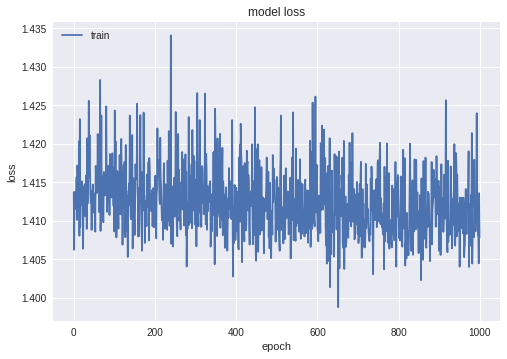

In [246]:
import matplotlib.pyplot as plt



plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
API_KEY = '40b453c139590191'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/Switzerland/Collombey.json"
target_date = datetime(2018, 7, 15)  
features = ["date","meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)

def extract_weather_data(url, api_key, target_date, days):  
    records_test = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records_test.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records_test
records_test = extract_weather_data(BASE_URL, API_KEY, target_date, 5) 
#we use the data from x-n day to predict the mean temperature at the day x otherwise we could have missing data

In [69]:
df1 = pd.DataFrame(records_test, columns=features)
print(df1)

        date meantempm meandewptm meanpressurem maxhumidity minhumidity  \
0 2018-07-15        22         14       1016.59          94          22   
1 2018-07-16        22         11       1013.20          77          16   
2 2018-07-17        23         11       1015.58          70          17   
3 2018-07-18        23         11       1015.97          68          20   
4 2018-07-19        26         12       1014.32          60          17   

  maxtempm mintempm maxdewptm mindewptm maxpressurem minpressurem precipm  
0       30       14        16        10         1021         1010     0.0  
1       30       14        13         9         1017         1005     0.0  
2       29       17        13         7         1018         1012     0.0  
3       31       15        14         9         1020         1009     0.0  
4       33       20        13        10         1017         1008     0.0  


In [0]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
for feature in features:
    if feature != 'date':
        for N in range(1,4):
            derive_nth_day_feature(df1, feature, N)    

In [71]:
df1 = df1.apply(pd.to_numeric, errors="coerce")
print(df1)

                  date  meantempm  meandewptm  meanpressurem  maxhumidity  \
0  1531612800000000000         22          14        1016.59           94   
1  1531699200000000000         22          11        1013.20           77   
2  1531785600000000000         23          11        1015.58           70   
3  1531872000000000000         23          11        1015.97           68   
4  1531958400000000000         26          12        1014.32           60   

   minhumidity  maxtempm  mintempm  maxdewptm  mindewptm    ...      \
0           22        30        14         16         10    ...       
1           16        30        14         13          9    ...       
2           17        29        17         13          7    ...       
3           20        31        15         14          9    ...       
4           17        33        20         13         10    ...       

   mindewptm_3  maxpressurem_1  maxpressurem_2  maxpressurem_3  \
0          NaN             NaN             N

In [0]:
df1 = df1.drop([0,1,2,3])

In [80]:
df1.info()
print (df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4 to 4
Data columns (total 49 columns):
date               1 non-null int64
meantempm          1 non-null int64
meandewptm         1 non-null int64
meanpressurem      1 non-null float64
maxhumidity        1 non-null int64
minhumidity        1 non-null int64
maxtempm           1 non-null int64
mintempm           1 non-null int64
maxdewptm          1 non-null int64
mindewptm          1 non-null int64
maxpressurem       1 non-null int64
minpressurem       1 non-null int64
precipm            1 non-null float64
meantempm_1        1 non-null float64
meantempm_2        1 non-null float64
meantempm_3        1 non-null float64
meandewptm_1       1 non-null float64
meandewptm_2       1 non-null float64
meandewptm_3       1 non-null float64
meanpressurem_1    1 non-null float64
meanpressurem_2    1 non-null float64
meanpressurem_3    1 non-null float64
maxhumidity_1      1 non-null float64
maxhumidity_2      1 non-null float64
maxhumidi

In [0]:
X = df1[[col for col in df1.columns if col != 'meantempm']]

In [0]:
X = X.drop(["meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem",
                "minpressurem","precipm"  ], axis=1)

In [0]:
X = X.drop(['mintempm', 'maxtempm',"date"], axis=1)


In [84]:
print(X)

   meantempm_1  meantempm_2  meantempm_3  meandewptm_1  meandewptm_2  \
4         23.0         23.0         22.0          11.0          11.0   

   meandewptm_3  meanpressurem_1  meanpressurem_2  meanpressurem_3  \
4          11.0          1015.97          1015.58           1013.2   

   maxhumidity_1    ...      mindewptm_3  maxpressurem_1  maxpressurem_2  \
4           68.0    ...              9.0          1020.0          1018.0   

   maxpressurem_3  minpressurem_1  minpressurem_2  minpressurem_3  precipm_1  \
4          1017.0          1009.0          1012.0          1005.0        0.0   

   precipm_2  precipm_3  
4        0.0        0.0  

[1 rows x 36 columns]


In [0]:
X = X.values

In [85]:
model.predict(X,steps = 1)

array([[21.786856]], dtype=float32)

In [2]:
!git clone https://github.com/roxasboss/TM-lyca.git

Cloning into 'TM-lyca'...


In [3]:
echo "# TM-lyca" >> README.md
git init
git add README.md
git commit -m "first commit"
git remote add origin https://github.com/roxasboss/TM-lyca.git
git push -u origin master

SyntaxError: ignored